Available countries:
1. Afghanistan
2. Albania
3. Algeria
4. American Samoa
5. Andean Latin America
6. Andorra
7. Angola
8. Antigua and Barbuda
9. Argentina
10. Armenia
11. Australasia
12. Australia
13. Austria
14. Azerbaijan
15. Bahamas
16. Bahrain
17. Bangladesh
18. Barbados
19. Belarus
20. Belgium
21. Belize
22. Benin
23. Bermuda
24. Bhutan
25. Bolivia
26. Bosnia and Herzegovina
27. Botswana
28. Brazil
29. Brunei
30. Bulgaria
31. Burkina Faso
32. Burundi
33. Cambodia
34. Cameroon
35. Canada
36. Cape Verde
37. Caribbean
38. Central African Republic
39. Central Asia
40. Central Europe
41. Central Latin America
42. Central Sub-Saharan Africa
43. Chad
44. Chile
45. China
46. Colombia
47. Comoros
48. Congo
49. Costa Rica
50. Cote d'Ivoire
51. Croatia
52. Cuba
53. Cyprus
54. Czech Republic
55. Democratic Republic of Congo
56. Denmark
57. Djibouti
58. Dominica
59. Dominican Republic
60. East Asia
61. Eastern Europe
62. Eastern Sub-Saharan Africa
63. Ecuador
64. Egypt
65. El Salvador
66. En

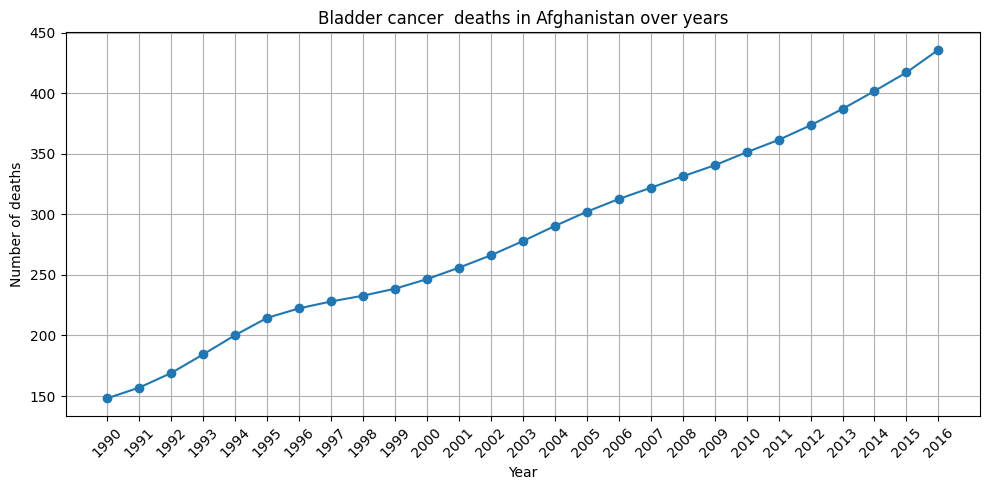

In [ ]:
import csv
import matplotlib.pyplot as plt

filename = 'Cancer Deaths by Country and Type Dataset.csv'

# Хранилище данных: {(country, cancer_type): {year: value}}
data = {}

with open(filename, encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)

    cancer_types = header[3:]  # Типы рака начинаются с 4-го столбца

    for row in reader:
        country = row[0]
        year = row[2]

        for i, cancer_type in enumerate(cancer_types):
            value_str = row[3 + i]
            try:
                value = float(value_str)
            except ValueError:
                continue

            key = (country, cancer_type)
            if key not in data:
                data[key] = {}
            data[key][year] = value

# Список стран и видов рака
countries = sorted(set(k[0] for k in data.keys()))
cancer_types = sorted(set(k[1] for k in data.keys()))

# Выбор страны
print("Available countries:")
for i, country in enumerate(countries):
    print(f"{i + 1}. {country}")
country_index = int(input("Select a country by number: ")) - 1
selected_country = countries[country_index]

# Выбор типа рака
print("\nAvailable cancer types:")
for i, cancer in enumerate(cancer_types):
    print(f"{i + 1}. {cancer}")
cancer_index = int(input("Select a cancer type by number: ")) - 1
selected_cancer = cancer_types[cancer_index]

# Получение данных и построение графика
key = (selected_country, selected_cancer)
if key in data:
    year_values = data[key]
    years = sorted(year_values.keys())
    values = [year_values[year] for year in years]

    plt.figure(figsize=(10, 5))
    plt.plot(years, values, marker='o')
    plt.title(f"{selected_cancer} deaths in {selected_country} over years")
    plt.xlabel("Year")
    plt.ylabel("Number of deaths")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the selected country and cancer type.")